# Graphs comparison
We compare networks from different years. 
We compare features such as: 
1. community structure (non-linear measures)
2. treenness (by calculating how far is graph from Minimal Spanning Tree)       https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.mst.minimum_spanning_tree.html#networkx.algorithms.mst.minimum_spanning_tree
3. 


# Comparison with random model 

The main ideas are:
- to generate ER graph (and then random geometric graph) with the same number of nodes and links as for Hungary for different years
- to calculate the same properties we calculated for real networks.



In [4]:
import csv
import networkx as nx
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt

CSV_DELIMITER = ';'
NODE_FILE_NAME = 'nodes.csv'
EDGE_FILE_PATTERN = re.compile(r'edges_(\d+)\.csv')
NODE_ID_COLUMN = 'id'
NODE_X_COLUMN = 'x'
NODE_Y_COLUMN = 'y'
EDGE_FROM_COLUMN = 'initial_node'
EDGE_TO_COLUMN = 'final_node'
EDGE_LENGTH_COLUMN = 'length'


def add_if_absent(g, e, node_data):
    if not e in g.nodes:
        g.add_node(e, x=node_data[e][NODE_X_COLUMN], y=node_data[e][NODE_Y_COLUMN])


def read_edge_file(path, node_data):
    with open(path) as f:
        G = nx.Graph()
        reader = csv.DictReader(f, delimiter=CSV_DELIMITER)
        for e in reader:
            f = e[EDGE_FROM_COLUMN]
            t = e[EDGE_TO_COLUMN]
            add_if_absent(G, f, node_data)
            add_if_absent(G, t, node_data)
            G.add_edge(f, t, length=e[EDGE_LENGTH_COLUMN])
        return G


def read_folder(path):
    node_file = join(path, NODE_FILE_NAME)
    if not isfile(node_file):
        raise FileNotFoundError('The file {} was expected but not found'.format(node_file))
    with open(node_file) as f:
        reader = csv.DictReader(f, delimiter=CSV_DELIMITER)
        node_data = {n[NODE_ID_COLUMN] : n for n in reader}
    result = {}
    for f in listdir(path):
        m = EDGE_FILE_PATTERN.match(f.lower())
        if m:
            year = m[1]
            graph = read_edge_file(join(path, f), node_data)
            result[year] = graph
    return result
            

# Some testing code
if __name__ == "__main__":
    graphs = read_folder('Networks_Hungary')#
    for y,g in graphs.items():
        #fig, ax = plt.subplots()
        #fig= plt.figure(figsize=(6,3))
        #pos = {n: (float(g.nodes[n]['x']), float(g.nodes[n]['y'])) for n in g.nodes}
        print('graph #')
        # get number of nodes from real  graph 
        n1 = g.number_of_nodes()
        # get number of links in graphs of  
        l1 = g.number_of_edges()

        # calculate p for Erdos Renyi graph - null model
        p1 =  l1 * 1./(n1*(n1-1)/2)  # real number of links to number of links potentially existing 

        print('probability', p1)

        G1_rand = nx.erdos_renyi_graph(n1, p1)
        e1_rand = G1_rand.number_of_edges()
        
        
        print('number of edges non random', l1)
        print('number of edges random',e1_rand)
        #nx.draw(g, pos, ax=ax, node_size=0.5)
        #plt.savefig('output'+str(y)+'.pdf')
        #plt.show()
        
        


graph #
probability 0.0008003163003067348
number of edges non random 2510
number of edges random 2502
graph #
probability 0.0005736683793343833
number of edges non random 3555
number of edges random 3584
graph #
probability 0.00040093069590474325
number of edges non random 5558
number of edges random 5694
graph #
probability 0.0001661380912646462
number of edges non random 14016
number of edges random 14076
graph #
probability 7.523427914484514e-05
number of edges non random 31378
number of edges random 31592


In [ ]:
import networkx as nx 


# get number of nodes from real graph 
n1 = G1.number_of_nodes()
# get number of links in graphs 
l1 = G1.number_of_edges()

# calculate p for Erdos Renyi graph 
p1 =  l1 * 1./(n1*(n1-1)/2)  # real number of links to number of links potentially existing 

print('probability', p1)

G1_rand = erdos_renyi_graph(n1, p1)



# Load street networks of Hungary 

In [ ]:
import csv
import networkx as nx
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt

CSV_DELIMITER = ';'
NODE_FILE_NAME = 'nodes.csv'
EDGE_FILE_PATTERN = re.compile(r'edges_(\d+)\.csv')
NODE_ID_COLUMN = 'id'
NODE_X_COLUMN = 'x'
NODE_Y_COLUMN = 'y'
EDGE_FROM_COLUMN = 'initial_node'
EDGE_TO_COLUMN = 'final_node'
EDGE_LENGTH_COLUMN = 'length'


def add_if_absent(g, e, node_data):
    if not e in g.nodes:
        g.add_node(e, x=node_data[e][NODE_X_COLUMN], y=node_data[e][NODE_Y_COLUMN])


def read_edge_file(path, node_data):
    with open(path) as f:
        G = nx.Graph()
        reader = csv.DictReader(f, delimiter=CSV_DELIMITER)
        for e in reader:
            f = e[EDGE_FROM_COLUMN]
            t = e[EDGE_TO_COLUMN]
            add_if_absent(G, f, node_data)
            add_if_absent(G, t, node_data)
            G.add_edge(f, t, length=e[EDGE_LENGTH_COLUMN])
        return G


def read_folder(path):
    node_file = join(path, NODE_FILE_NAME)
    if not isfile(node_file):
        raise FileNotFoundError('The file {} was expected but not found'.format(node_file))
    with open(node_file) as f:
        reader = csv.DictReader(f, delimiter=CSV_DELIMITER)
        node_data = {n[NODE_ID_COLUMN] : n for n in reader}
    result = {}
    for f in listdir(path):
        m = EDGE_FILE_PATTERN.match(f.lower())
        if m:
            year = m[1]
            graph = read_edge_file(join(path, f), node_data)
            result[year] = graph
    return result
            

# Some testing code
if __name__ == "__main__":
    graphs = read_folder('Networks_Hungary')
    for y,g in graphs.items():
        fig, ax = plt.subplots()
        #fig= plt.figure(figsize=(6,3))
        pos = {n: (float(g.nodes[n]['x']), float(g.nodes[n]['y'])) for n in g.nodes}
        nx.draw(g, pos, ax=ax, node_size=0.5)
        plt.savefig('output'+str(y)+'.pdf')
        plt.show()
        
        # get data on graphs 
        
        


In [ ]:
# centrality for the first network 

graphs = read_folder('Networks_Hungary')
for y,g in graphs.items():
    fig, ax = plt.subplots(figsize=(20,10))
    degcent = dict(nx.degree_centrality(g))
    betcent =  dict(nx.betweenness_centrality(g))
    pos = {n: (float(g.nodes[n]['x']), float(g.nodes[n]['y'])) for n in g.nodes}
    nx.draw(g, pos, ax=ax, node_size=20, node_color=list(degcent.values()))# node_size = list(degcent.values()))
    plt.savefig('dijoutput_deg'+str(y)+'.jpg') # , format = 'eps') #eps', format='eps')
    plt.show()



In [4]:
print(cent.values())

dict_values([3.6328760753313184e-05, 4.779250303546979e-05, 0.0, 1.243250923557829e-05, 2.454209615334935e-05, 5.8933322999819165e-05, 6.97512206463613e-05, 8.024619597509624e-05, 2.098995065746984e-05, 2.421917383554212e-05, 2.7125474695807177e-05, 2.9708853238265002e-05, 3.19693094629156e-05, 3.390684336975897e-05, 3.552145495879511e-05, 3.681314423002402e-05, 4.262574595055413e-05, 3.778191118344571e-05, 3.842775581906017e-05, 3.875067813686739e-05, 8.073057945180707e-07, 0.0, 0.004826491596126076, 0.11295907074763017, 0.0038375642307867173, 0.0025632885455456455, 0.0021734136671797025, 0.0017847766576986742, 0.0014651104732626393, 0.001215060958507223, 0.0009669489776586756, 0.0007240737203972523, 0.0005253742362118317, 0.0005137947800991181, 0.0035013798009322274, 0.00013054134697357205, 0.0001563751323981503, 0.11268790679053795, 0.05946546989876778, 0.09661900327632682, 0.004479257712820158, 0.0037472020447031095, 0.003993322671258518, 0.00011366865586814436, 5.8933322999819165e

In [ ]:
# plotting with other colorbar 

graphs = read_folder('Networks_Hungary')
cmap = plt.cm.coolwarm

for y,g in graphs.items():
    fig, ax = plt.subplots(figsize=(20,10))
    degcent = dict(nx.degree_centrality(g))
    vmin = min(list(degcent))#.min() 
    vmax = max(list(degcent))#.max()
    print(vmin, vmax)

    nx.draw_networkx(g, node_color=list(degcent),
                 cmap=cmap, vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = plt.colorbar(sm)


# Comparison of networks centrality distributions 

In [20]:
import seaborn

graphs = read_folder('Networks_Hungary') # folder where we take networks

def deg_measures_for_network(G):
    # -*- coding: utf-8 -*-
    
    seaborn.distplot(list(nx.degree_centrality(G).values()), bins=20)
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    #plt.show()    
    
def betw_measures_for_network(G):
    seaborn.distplot(list(nx.betweenness_centrality(G).values()), bins=20)#plt.hist(list(nx.betweenness_centrality(G).values()))
    plt.xlabel('betweenness')
    plt.ylabel('frequency')
    plt.show()



C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


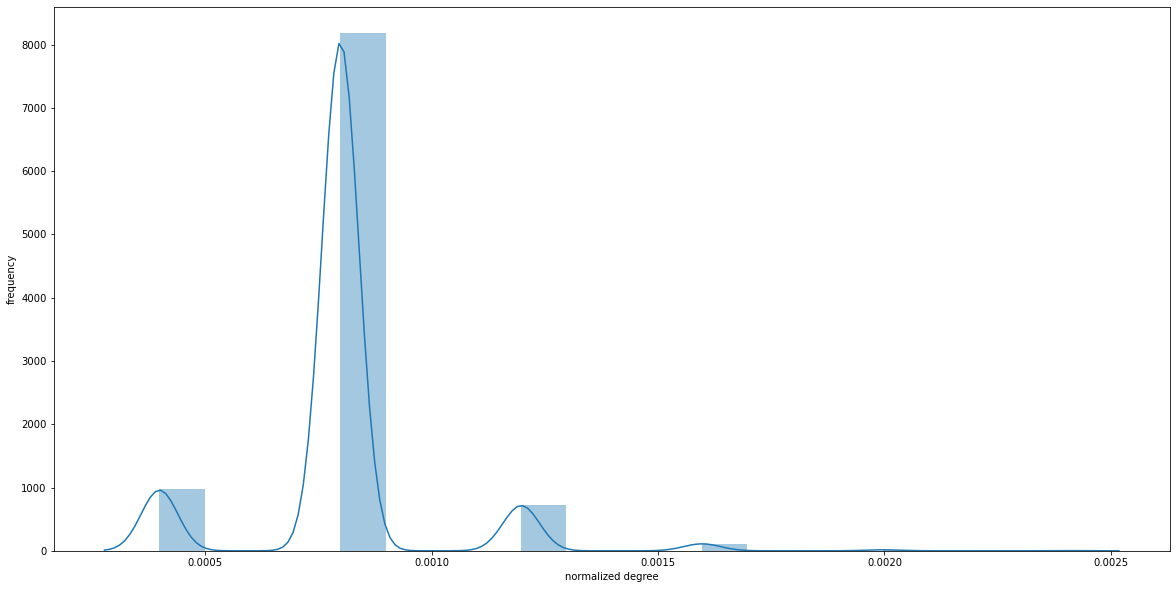

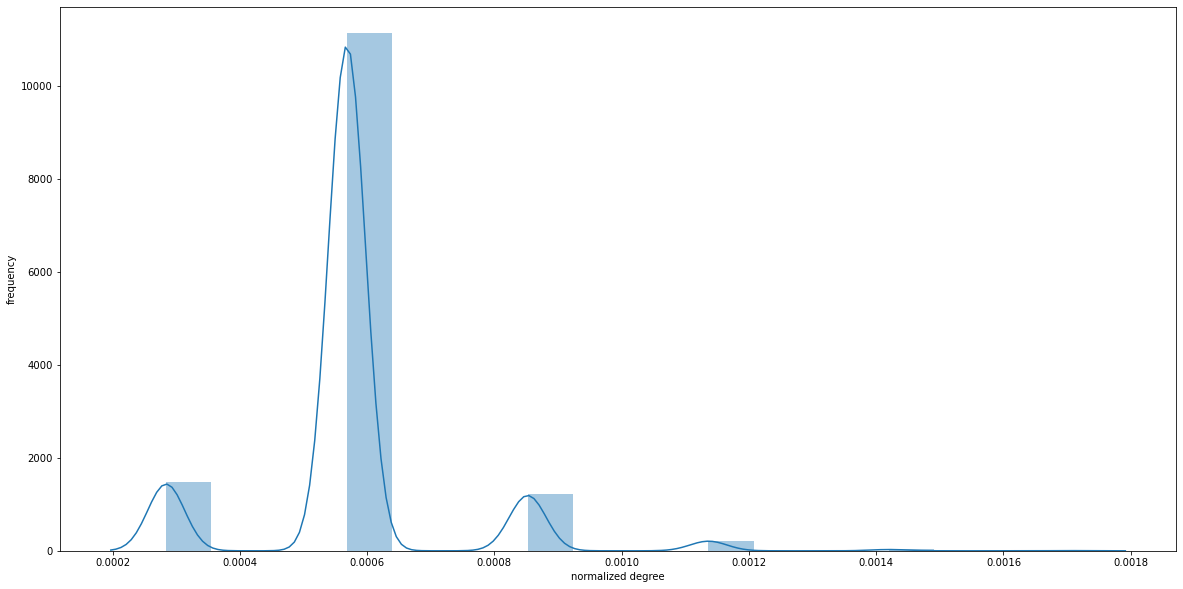

In [22]:
    
for y,g in graphs.items():
    fig, ax = plt.subplots(figsize=(20,10))
    degcent = dict(nx.degree_centrality(g))
    deg_measures_for_network(g)
plt.show()    
# comparison of networks centrality measures for the same nodes
# comparison of general patterns with high betweenness shifted in a network



In [ ]:


# Some testing code
if __name__ == "__main__":
    graphs = read_folder('Networks_Hungary')
    for y,g in graphs.items():
        fig, ax = plt.subplots(figsize=(15,15))
        
        #fig= plt.figure(figsize=(10,10))
        pos = {n: (float(g.nodes[n]['x']), float(g.nodes[n]['y'])) for n in g.nodes}
        nx.draw(g, pos, ax=ax, node_size=0.5)
        plt.savefig('output'+str(y)+'.pdf')
        
        

# Analysis of evolution of nodes and edges of networks 

Let us look at nodes and edges
and compare  graphs  using nodes and edges number (global quantities) plotted on linear scale of years.



In [ ]:
import os
import json
import requests
from datetime import datetime
from collections import defaultdict
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
import numpy
import matplotlib
from matplotlib import pyplot as plt


filepath = 'Networks_Hungary/1.csv'
df_0= pd.read_csv(filepath,delimiter=';')

filepath = 'Networks_Hungary/2.csv'
df_1= pd.read_csv(filepath,delimiter=';')

filepath = 'Networks_Hungary/3.csv'
df_2= pd.read_csv(filepath,delimiter=';')

filepath = 'Networks_Hungary/4.csv'
df_3= pd.read_csv(filepath,delimiter=';')

filepath = 'Networks_Hungary/5.csv'
df_4= pd.read_csv(filepath,delimiter=';')
df_4.head()



In [ ]:
#plot number of edges evolving over time

fig, ax = plt.subplots(figsize=(5,5))
ed0 =  df_0.size
ed1 =  df_1.size
ed2 =  df_2.size
ed3 =  df_3.size
ed4 =  df_4.size

plt.plot([1790, 1848, 1883, 1944, 2019], [ed0, ed1, ed2, ed3, ed4], '*-')
plt.ylabel('links number')
plt.xlabel('years')
plt.title('Hungary network')


In [ ]:
#plot number of nodes 
# (calculate unique identifiers)

fig, ax = plt.subplots(figsize=(5,5))
nod0 =  np.size(np.unique(np.concatenate((df_0.initial_node.values, df_0.final_node.values), axis=None))) #df_1786.size #array_orcid = np.unique(df1786.orcid.values)
print(np.size(nod0))
nod1 =  np.size(np.unique(np.concatenate((df_1.initial_node.values, df_1.final_node.values), axis=None))) #df_1786.size #array_orcid = np.unique(df1786.orcid.values)
nod2 =  np.size(np.unique(np.concatenate((df_2.initial_node.values, df_2.final_node.values), axis=None))) #df_1786.size #array_orcid = np.unique(df1786.orcid.values)
nod3 =  np.size(np.unique(np.concatenate((df_3.initial_node.values, df_3.final_node.values), axis=None))) #df_1786.size #array_orcid = np.unique(df1786.orcid.values)
nod4 =  np.size(np.unique(np.concatenate((df_4.initial_node.values, df_4.final_node.values), axis=None))) #df_1786.size #array_orcid = np.unique(df1786.orcid.values)
plt.plot([1790, 1848, 1883, 1944, 2019], [nod0, nod1, nod2, nod3, nod4], '*-')
plt.ylabel('nodes number')
plt.xlabel('years')
plt.title('Hungary')




# Networkx object
Make a networkx from edges and nodes 


shape of nodes (30123, 3)
shape of edges (2510, 4)
loaded edges
nodes # 30123
edges # 2510


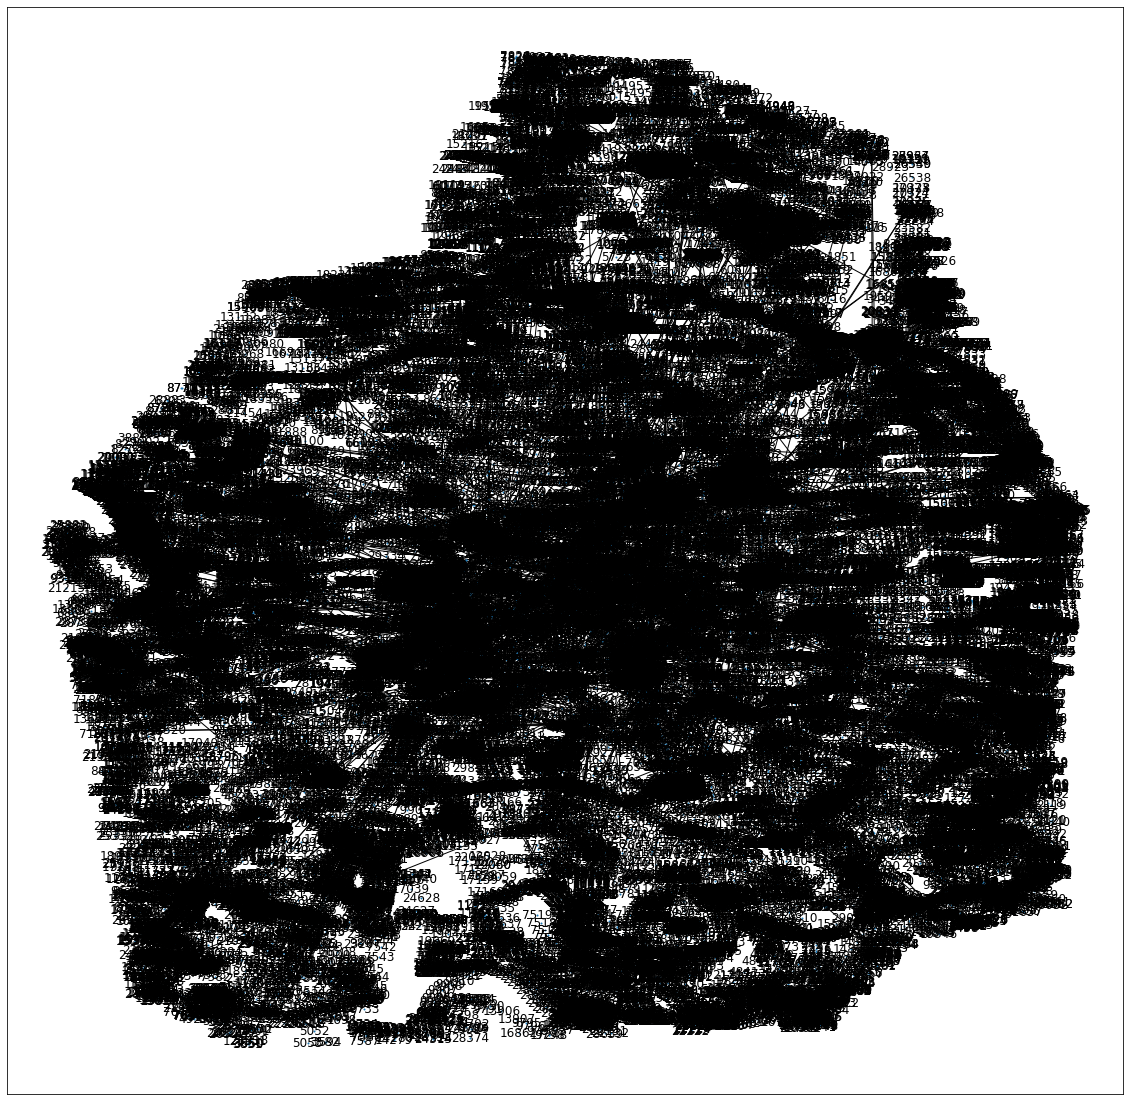

In [27]:
# build a networkx from data o

import networkx as nx

shape = df_node.shape
size_node = shape[0]
print('shape of nodes', shape)

G =nx.Graph()

#adding nodes to graph
nodes_list = []
for ind in range(1, size_node):
    #print(ind)
    #nodes_list.append((ind ,(df_1374_node.x.iloc[ind],df_1374_node.y.iloc[ind])))
    G.add_node(ind ,pos=(df_node.x.iloc[ind],df_node.y.iloc[ind]))

G.add_node(30123,pos= (df_node.x.iloc[ind],df_node.y.iloc[ind])) #IF Node 19804 has no position then we add random position
#draw graph with positions 
pos=nx.get_node_attributes(G,'pos')


df_edge = df_0 # the first snapshot of network 
shape = df_edge.shape
size = shape[0]
print('shape of edges', shape)


#adding edges
edges_list = []
for ind in range(size): 
    #print(df_1374.initial_node.iloc[ind], df_1374.final_node.iloc[ind])
    G.add_edge(df_edge.initial_node.iloc[ind], df_edge.final_node.iloc[ind])
    edges_list.append((df_edge.initial_node.iloc[ind], df_edge.final_node.iloc[ind]))
print('loaded edges')

#G.add_edges_from(edges_list)
#G.add_nodes_from()
print('nodes #',G.number_of_nodes())
print('edges #',G.number_of_edges())
fig, ax = plt.subplots(1, 1, figsize=(20, 20));
nx.draw_networkx(G,pos, node_size = 1,  with_labels=False)




# Centrality measures

We would like to see how centrality measure is changing over time. 

In [ ]:

#p = 0.5
#G = nx.erdos_renyi_graph(n, p)
cent =  dict(nx.betweenness_centrality(G))



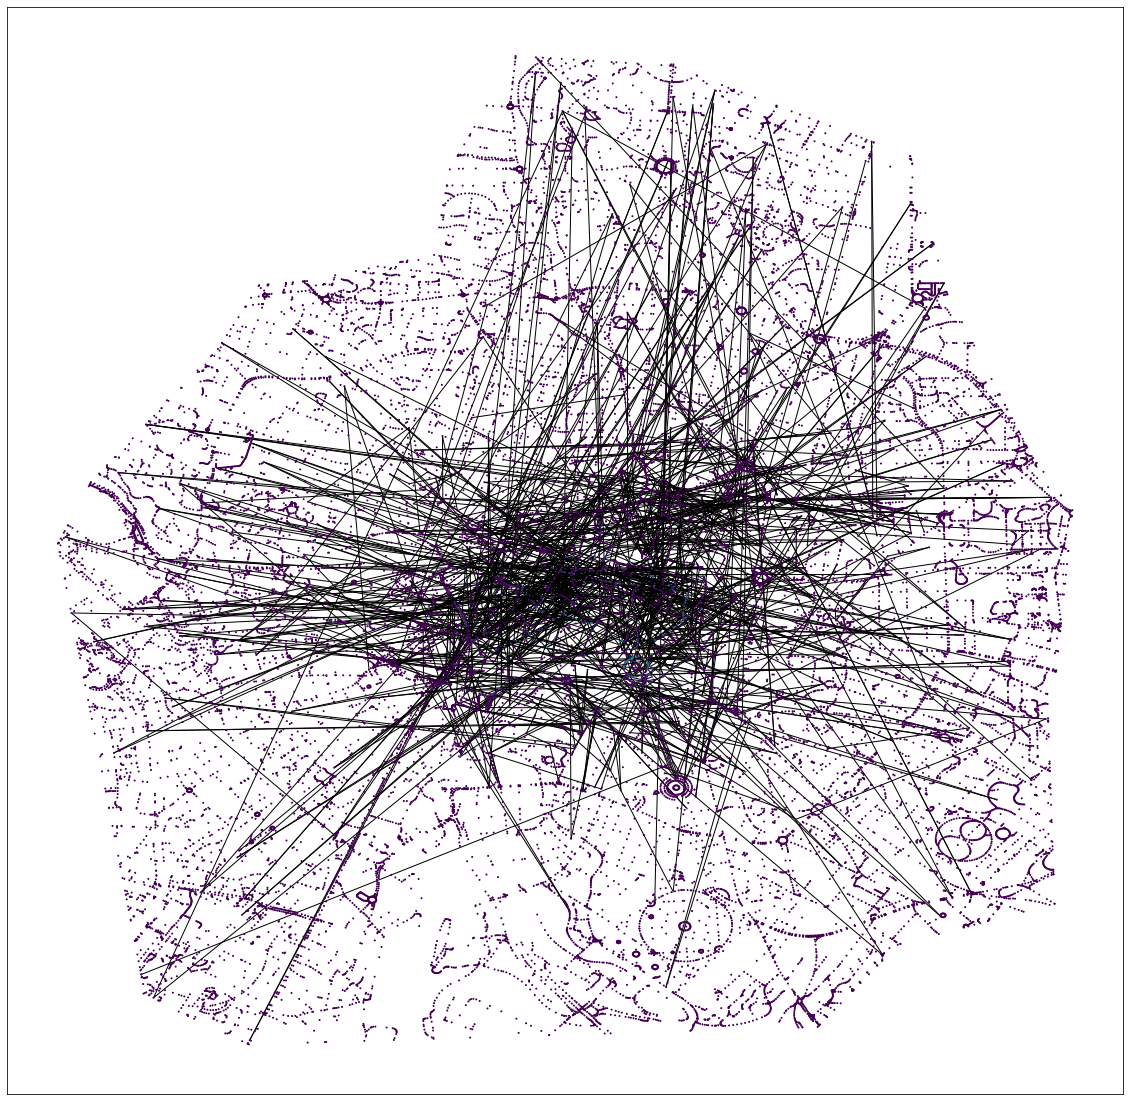

In [31]:

plt.figure(figsize=(20, 20))
nx.draw_networkx(G,pos, node_size = 1,  node_color=list(cent.values()), with_labels=False)


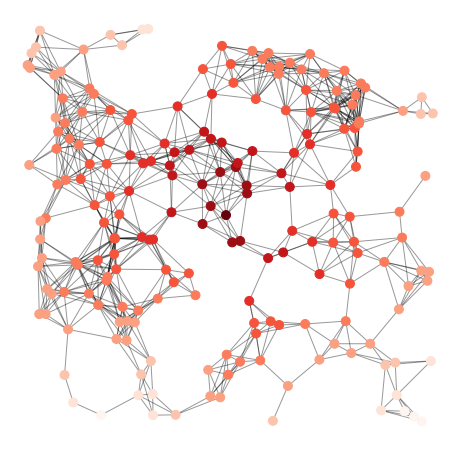

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(20, 20))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()



# Netrd application

Comparison of networks can be done using netrd package. (in progress)

In [ ]:

#Netrd: A library for network reconstruction and graph distances

#https://netrd.readthedocs.io/en/latest/distance.html

import networkx as nx
#!pip install netrd
#import netrd #need to run from linux system


G1 = nx.fast_gnp_random_graph(1000, 0.1)
G2 = nx.fast_gnp_random_graph(1000, 0.1)

#dist = netrd.distance.NetSimile()
#D = dist.dist(G1, G2)
#base distance between graphs comparison 

dist_obj = DistanceAlgorithm()

distance = dist_obj.dist(G1, G2)# <some_params>)

# Treenness vs. heterogeneity of networks 
Date: 22.02.2021 

We decided to compare city evolution in the phase space of two dimensions: 
1. treeness (how far graph is from the tree), or how many cycles does it have
2. heterogeneity (how far is it from the grid) 

For the **treeness** measure we calculate both:
1. number of cycles nx.simple_cycles(G), you will get the cycle in the graph as a set of nodes that are in a cycle
2. calculate and draw minimal spanning tree of a graph

**Caution!!**
#listcyclemin = nx.minimum_cycle_basis(g.to_undirected()) # takes too long time!!! 


In [2]:
# test for smaller graphs 
import networkx as nx

G_t=nx.cycle_graph(4)
G_t.add_edge(0,3,weight=2) # assign weight 2 to edge 0-3
T=nx.minimum_spanning_tree(G_t)
print(sorted(T.edges(data=True)))

[(0, 1, {}), (1, 2, {}), (2, 3, {})]


Caution, costly to plot minimal spanning tree! 

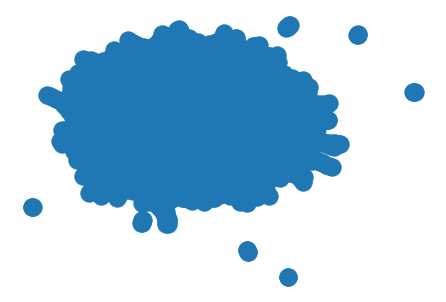

In [3]:

import networkx as nx

MinTree=nx.minimum_spanning_tree(g)
#print(sorted(MinTree.edges(data=True)))
nx.draw(MinTree)


In [4]:
#g1 # graph for year 1790 
listcycle = nx.cycle_basis(G_t.to_undirected())
listcycle = nx.cycle_basis(g.to_undirected()) # apply to graph from city

print('cycle basis is calculated')
print(listcycle)
#listcyclemin = nx.minimum_cycle_basis(g.to_undirected()) # takes too long time!!! 

KeyboardInterrupt: 

In [5]:
print(len(listcycle))
#print(len(listcyclemin))


2509



For **heterogeneity**: we can find subgraph of a grid in a network of compare degree distribution with the homogeneous network degree distribution. 
For this we need to compare the degree distribution of $G$ with Homogeneous distribution on N nodes. 

For this we can use Kolmogorov-Smirnov statistics. 

    scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='auto')[source]
which performs the (one sample or two samples) Kolmogorov-Smirnov test for goodness of fit.


In [15]:
import scipy
from scipy import stats
degcent = list(nx.degree_centrality(g).values()) #should be 1d array
#print(degcent)
scipy.stats.kstest(degcent, 'norm') 


KstestResult(statistic=0.5000138133125696, pvalue=0.0)